# Data set Context

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:
-> time
-> summary
-> precipType
-> temperature
-> apparentTemperature
-> humidity
-> windSpeed
-> windBearing
-> visibility
-> loudCover
-> pressure

# Task  : 
In this project we investigate the relationship between humidity and apparent temperature. Also we predict the apparent temperature based on humidity.

# Imorting All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,max_error

**Importing Data Set** : 
Importing dataset from downloaded file on System using Panda library

In [2]:
original_data = pd .read_csv( "C:\\Users\\SS\\Downloads\\MDS Course files\\Projects\\Data Sets\\szeged-weather Regression Project\\weatherHistory.csv" )

In [3]:
original_data .head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


This Shows Data has 12 columns. But we dont know the no. of entries. So, We find **SHAPE** of the data

In [4]:
original_data .shape

(96453, 12)

This dataset has 96453 enteries/rows and 12 features/columns

### Info on features/columns of the Data set

In [5]:
original_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Result of this code shows 8 features are of float data type and 4 are objects.

### Statistical Information of the Data set

In [6]:
original_data .describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Correlation between each Features of the Data set

In [7]:
original_data .corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


### -> This Correlation Table shows apparent temperature and humidity are negatively correlated.

# Extracting Dependent and Independent Feature from Data set

-> Dependent Feature/Variable, y = apparent temperature (C)

-> Independent Feature/Variable, x = Humidity

In [24]:
model_data = original_data[['Humidity','Apparent Temperature (C)']]
model_data .head(5)

,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778


In [25]:
model_data .shape

(96453, 2)

### Null Values in Dependent and Independent Variable

We check null values using **.isnull** & **.sum()**

In [26]:
print( f"Number of Null Vaues in Dependent Featrure is \n { model_data[['Humidity']] .isnull() .sum() }" )

Number of Null Vaues in Dependent Featrure is 
 Humidity    0
dtype: int64


In [27]:
print( f"Number of Null Vaues in Independent Feature is \n { model_data[['Apparent Temperature (C)']] .isnull() .sum() }" )

Number of Null Vaues in Independent Feature is 
 Apparent Temperature (C)    0
dtype: int64


### Now we separate Dependent & Independent Feature in x & y variable

In [28]:
x = model_data[['Humidity']] .values
y = model_data['Apparent Temperature (C)'] .values

In [29]:
print( x[0:5] )
print( f"Shape of Independent(x) variable is { x.shape }" )

[[0.89]
 [0.86]
 [0.89]
 [0.83]
 [0.83]]
Shape of Independent(x) variable is (96453, 1)


In [30]:
print( y[0:5] )
print( f"Shape of Dependent(y) variable is { y.shape }" )

[7.38888889 7.22777778 9.37777778 5.94444444 6.97777778]
Shape of Dependent(y) variable is (96453,)


# Data Visualization

### Scatter Plots

-> Apparent Temperature and Humidity

Text(0.5, 1.0, 'Humidity vs Apparent Temperature')

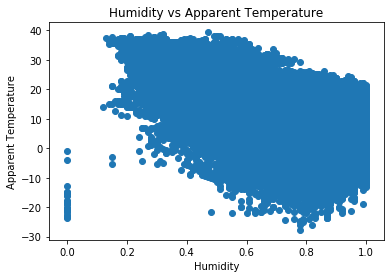

In [31]:
plt.scatter(x,y)
plt.xlabel("Humidity")
plt.ylabel("Apparent Temperature")
plt.title("Humidity vs Apparent Temperature",loc="Center")

### Apparent Temperature Distribution

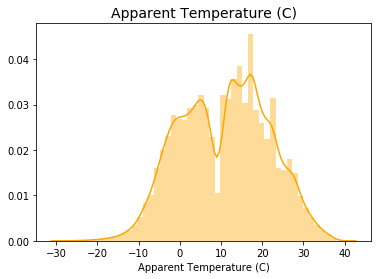

In [32]:
plt.title('Apparent Temperature (C)', fontsize=14)
sns.distplot(model_data['Apparent Temperature (C)'], color='orange')

Above Distribution graph has unnecessary range on x-axis. So, we use **.xlim()** function to get better visualization

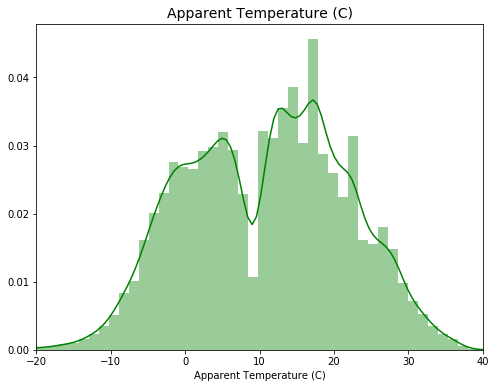

In [34]:
plt.figure(figsize=(8,6))
plt.xlim([-20, 40])
plt.title('Apparent Temperature (C)', fontsize=14)
sns.distplot(model_data['Apparent Temperature (C)'], color='green')

# Model Algorithm Starts

### First we split our data in train and test using train_test_split function

In [35]:
train_x , test_x , train_y , test_y = train_test_split( x , y , test_size = 0.25 )

In [36]:
print("Size of Train and Test Varibales. ")
print()
print( f"Size of train_x : {train_x .shape} and test_x : {test_x .shape}" )
print( f"Size of train_y : {train_y .shape} and test_y : {test_y .shape}" )

Size of Train and Test Varibales. 

Size of train_x : (72339, 1) and test_x : (24114, 1)
Size of train_y : (72339,) and test_y : (24114,)


Scatter Plot of the train and test Data set

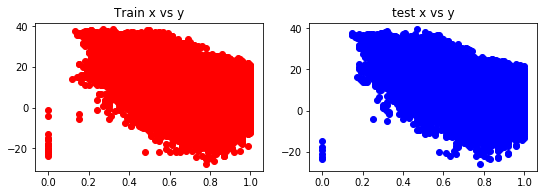

In [37]:
fig = plt.figure(figsize=(9,6)) 

plt1 = fig.add_subplot(221) 
plt2 = fig.add_subplot(222) 


plt1.scatter(train_x, train_y, color ='r') 
plt1.set_title('Train x vs y') 

plt2.scatter(test_x, test_y, color ='b') 
plt2.set_title('test x vs y') 

plt.show()

### We import Linear Regression model from linear_model Module

In [38]:
LReg = linear_model .LinearRegression() 

### Now we fit LReg model using train set

In [39]:
LReg .fit( train_x , train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Now LReg Model is ready.

We get linear coefficient (Slope) and y-intercept of the Best fit line of the model

In [40]:
print( f"Coefficient is {LReg.coef_}" )
print( f"Y-intercept is {LReg.intercept_}" )

Coefficient is [-32.89790333]
Y-intercept is 35.03528691291106


### Predicting Vaues for test_x

In [41]:
pred_y=LReg.predict(test_x)

Comparing some values of Actual test y and predicted y.

In [42]:
comp_df = pd.DataFrame({'Actual values':test_y,'Predicted values':pred_y})
comp_df.head(10)

,Actual values,Predicted values
0,10.116667,10.032880
1,23.727778,15.625524
2,15.994444,6.085132
3,12.088889,10.032880
4,5.744444,10.361859
5,7.677778,3.782279
6,7.961111,18.257356
7,20.466667,3.124321
8,6.150000,7.401048
9,1.600000,3.453300


### Visualizing the train data , test data and complete data with best fit line

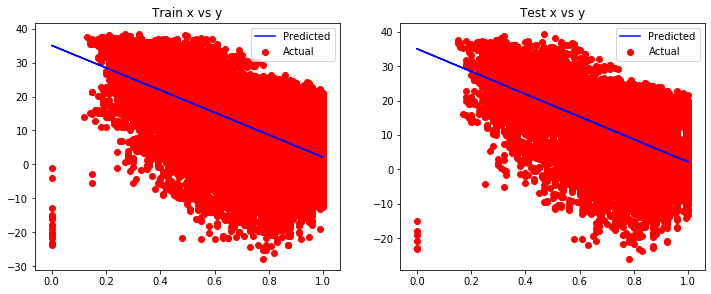

In [43]:
fig = plt.figure(figsize=(12,10)) 

plt1 = fig.add_subplot(221) 
plt2 = fig.add_subplot(222) 


plt1.scatter(train_x, train_y, color ='r',label = 'Actual') 
plt1.plot(train_x, LReg.predict(train_x), color= 'b', label = 'Predicted')
plt1.set_title('Train x vs y')
plt1.legend()


plt2.scatter(test_x, test_y, color ='r',label = 'Actual') 
plt2.plot(test_x, LReg.predict(test_x), color= 'b', label = 'Predicted')
plt2.set_title('Test x vs y')
plt2.legend()


plt.show()

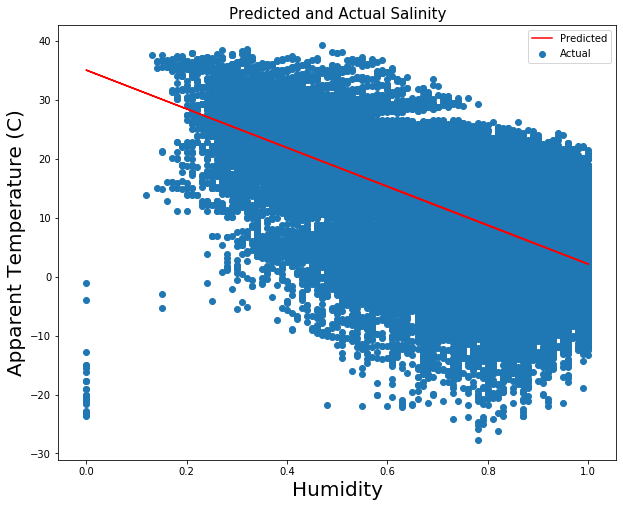

In [45]:
plt.figure(figsize=(10,8)) 
plt.scatter(x, y, label = 'Actual')
plt.plot(x, LReg.predict(x), color= 'red', label = 'Predicted')
plt.xlabel('Humidity', fontsize = 20)
plt.ylabel('Apparent Temperature (C)', fontsize = 20)
plt.title('Predicted and Actual Salinity', fontsize = 15)
plt.legend()

# Evaluation of LReg Model

Here, we evaluate the model using some error function and score functions

In [46]:
LReg.score(train_x,train_y)

0.36123392125650633

In [47]:
r2s = r2_score(test_y,pred_y)
print( f"r2 Score is {r2s}")

r2 Score is 0.3685780727310345


In [48]:
mae = mean_absolute_error(test_y,pred_y)
print( f"Mean Absolute Error is {mae}")

Mean Absolute Error is 6.961190138005814


In [49]:
mse = mean_squared_error(test_y,pred_y)
print( f"Mean Squared Error is {mse}")

Mean Squared Error is 72.90943984724956


In [50]:
me = max_error(test_y,pred_y)
print( f"Max Error is {me}")

Max Error is 58.30195357957773


In [51]:
error_df = pd.DataFrame({'r2 score': r2s , 'Mean Absolute Error' : mae , 'Mean Squared Error' : mse , 'Max Error' : me},index=[0])
error_df

,r2 score,Mean Absolute Error,Mean Squared Error,Max Error
0,0.368578,6.96119,72.90944,58.301954


# Conclusion

### From above table it is clear that this LReg Model .i.e., Univariate Linear Regression is not best for this Dataset or to predict Apparent Temperature on basis of only Humidity.